## Import Libraries

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import kstest
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima



In [195]:
#!pip install pmdarima

In [196]:
subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 10
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 10
heatmaps_text_fontSize = 8

plots_Title_fontSize = 14
plots_Title_textColour = 'black'

plots_Legend_fontSize = 12
plots_Legend_textColour = 'black'

plots_barTexts_fontSize = 8

## Import Market Data

In [197]:
df = pd.read_excel('Case2_Market data.xlsx', header=2)

In [198]:
df.head()

,date,MAB_ELE_PRO156,MAB_ELE_SHP156,MAB_ELE_PRO250,MAB_ELE_SHP250,MAB_ELE_PRO276,MAB_ELE_SHP276,MAB_ELE_PRO380,MAB_ELE_SHP380,MAB_ELE_PRO392,...,PRO28250_org,PRO28276_org,PRO27840_org,PRO271000_org,PRO27756_org,PRO27826_org,PRO27380_org,PRO27392_org,PRO27250_org,PRO27276_org
0,2004m2,16.940704,16.940704,112.091273,83.458866,82.623037,79.452532,124.289603,86.560493,109.334010,...,118.274109,80.829010,117.723991,NaN,81.100000,120.706516,141.510864,106.161262,102.077057,85.913200
1,2004m3,23.711852,23.711852,136.327976,106.168192,100.556582,97.012918,143.411662,106.344544,140.884616,...,148.121841,102.130104,119.220779,NaN,76.690307,138.309550,152.880234,140.288741,117.225685,97.670815
2,2004m4,24.435235,24.435235,117.791806,92.007646,89.653203,84.932358,129.083828,95.579673,105.853579,...,125.482231,90.961426,117.441124,NaN,71.552403,115.557330,137.796875,106.271197,105.335777,87.253983
3,2004m5,23.708115,23.708115,109.002541,85.696486,86.880571,82.372794,135.590391,100.087039,101.864777,...,116.649750,88.082901,117.899216,NaN,66.414500,119.269534,143.860535,101.608710,96.616508,84.675552
4,2004m6,27.009138,27.009138,133.785737,106.641482,99.010814,95.108740,136.424935,110.889719,120.332920,...,143.248734,100.978699,119.499107,NaN,61.276596,128.849416,144.315308,116.655248,118.458710,95.401802


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 48 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    219 non-null    object 
 1   MAB_ELE_PRO156          219 non-null    float64
 2   MAB_ELE_SHP156          219 non-null    float64
 3   MAB_ELE_PRO250          219 non-null    float64
 4   MAB_ELE_SHP250          219 non-null    float64
 5   MAB_ELE_PRO276          219 non-null    float64
 6   MAB_ELE_SHP276          219 non-null    float64
 7   MAB_ELE_PRO380          219 non-null    float64
 8   MAB_ELE_SHP380          219 non-null    float64
 9   MAB_ELE_PRO392          219 non-null    float64
 10  MAB_ELE_SHP392          219 non-null    float64
 11  MAB_ELE_PRO756          218 non-null    float64
 12  MAB_ELE_SHP756          218 non-null    float64
 13  MAB_ELE_PRO826          219 non-null    float64
 14  MAB_ELE_SHP826          201 non-null    fl

Index 2010=100 (if not otherwise noted)

In [200]:
df.head()

,date,MAB_ELE_PRO156,MAB_ELE_SHP156,MAB_ELE_PRO250,MAB_ELE_SHP250,MAB_ELE_PRO276,MAB_ELE_SHP276,MAB_ELE_PRO380,MAB_ELE_SHP380,MAB_ELE_PRO392,...,PRO28250_org,PRO28276_org,PRO27840_org,PRO271000_org,PRO27756_org,PRO27826_org,PRO27380_org,PRO27392_org,PRO27250_org,PRO27276_org
0,2004m2,16.940704,16.940704,112.091273,83.458866,82.623037,79.452532,124.289603,86.560493,109.334010,...,118.274109,80.829010,117.723991,NaN,81.100000,120.706516,141.510864,106.161262,102.077057,85.913200
1,2004m3,23.711852,23.711852,136.327976,106.168192,100.556582,97.012918,143.411662,106.344544,140.884616,...,148.121841,102.130104,119.220779,NaN,76.690307,138.309550,152.880234,140.288741,117.225685,97.670815
2,2004m4,24.435235,24.435235,117.791806,92.007646,89.653203,84.932358,129.083828,95.579673,105.853579,...,125.482231,90.961426,117.441124,NaN,71.552403,115.557330,137.796875,106.271197,105.335777,87.253983
3,2004m5,23.708115,23.708115,109.002541,85.696486,86.880571,82.372794,135.590391,100.087039,101.864777,...,116.649750,88.082901,117.899216,NaN,66.414500,119.269534,143.860535,101.608710,96.616508,84.675552
4,2004m6,27.009138,27.009138,133.785737,106.641482,99.010814,95.108740,136.424935,110.889719,120.332920,...,143.248734,100.978699,119.499107,NaN,61.276596,128.849416,144.315308,116.655248,118.458710,95.401802


In [201]:
#remover whitespace
df['date'] = df['date'].str.strip()

In [202]:
df['date'] = pd.to_datetime(df['date'], format='%Ym%m')

In [203]:
# put the date as the index
df.set_index('date',inplace=True)

In [204]:
df.head()

,MAB_ELE_PRO156,MAB_ELE_SHP156,MAB_ELE_PRO250,MAB_ELE_SHP250,MAB_ELE_PRO276,MAB_ELE_SHP276,MAB_ELE_PRO380,MAB_ELE_SHP380,MAB_ELE_PRO392,MAB_ELE_SHP392,...,PRO28250_org,PRO28276_org,PRO27840_org,PRO271000_org,PRO27756_org,PRO27826_org,PRO27380_org,PRO27392_org,PRO27250_org,PRO27276_org
date,,,,,,,,,,,,,,,,,,,,,
2004-02-01,16.940704,16.940704,112.091273,83.458866,82.623037,79.452532,124.289603,86.560493,109.334010,110.495272,...,118.274109,80.829010,117.723991,NaN,81.100000,120.706516,141.510864,106.161262,102.077057,85.913200
2004-03-01,23.711852,23.711852,136.327976,106.168192,100.556582,97.012918,143.411662,106.344544,140.884616,144.686166,...,148.121841,102.130104,119.220779,NaN,76.690307,138.309550,152.880234,140.288741,117.225685,97.670815
2004-04-01,24.435235,24.435235,117.791806,92.007646,89.653203,84.932358,129.083828,95.579673,105.853579,102.655769,...,125.482231,90.961426,117.441124,NaN,71.552403,115.557330,137.796875,106.271197,105.335777,87.253983
2004-05-01,23.708115,23.708115,109.002541,85.696486,86.880571,82.372794,135.590391,100.087039,101.864777,100.305285,...,116.649750,88.082901,117.899216,NaN,66.414500,119.269534,143.860535,101.608710,96.616508,84.675552
2004-06-01,27.009138,27.009138,133.785737,106.641482,99.010814,95.108740,136.424935,110.889719,120.332920,119.616380,...,143.248734,100.978699,119.499107,NaN,61.276596,128.849416,144.315308,116.655248,118.458710,95.401802


In [205]:
# convert the columns to float
for column in df.columns[0:]:
    df[column] = df[column].astype(float)

Checking duplicates

In [206]:
df.duplicated().sum()

0

## Data visualization

### Production vs Shipment Index 

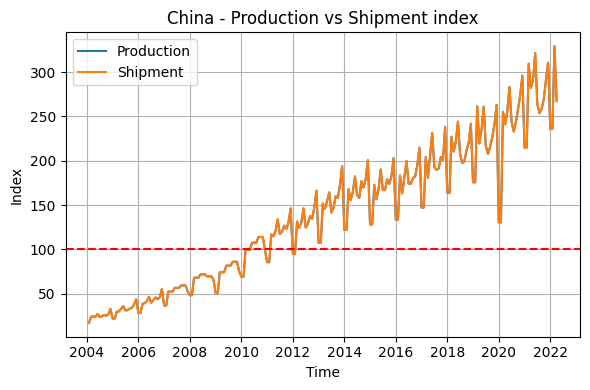

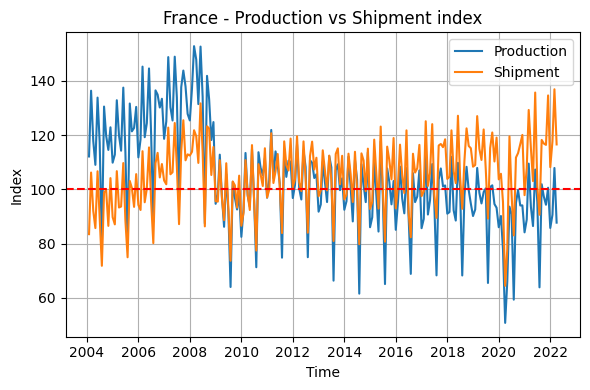

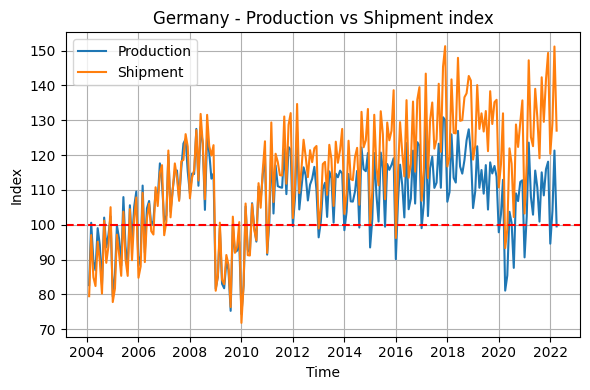

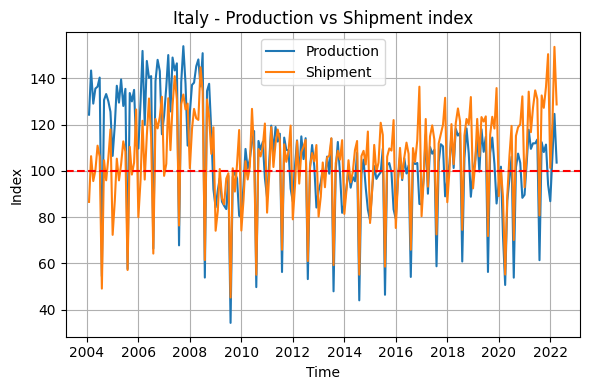

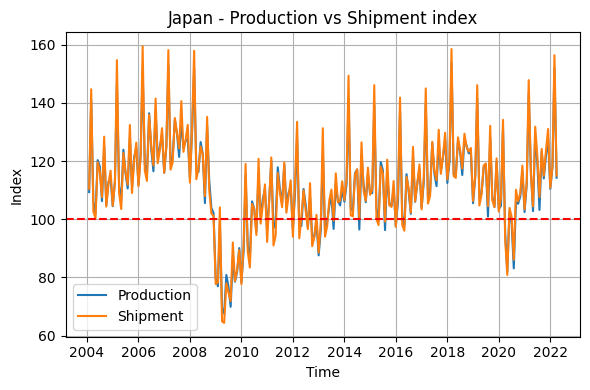

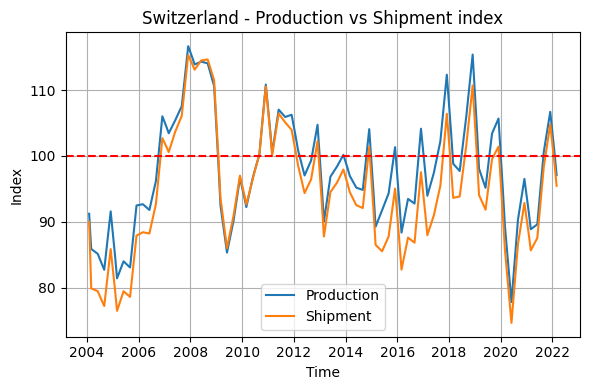

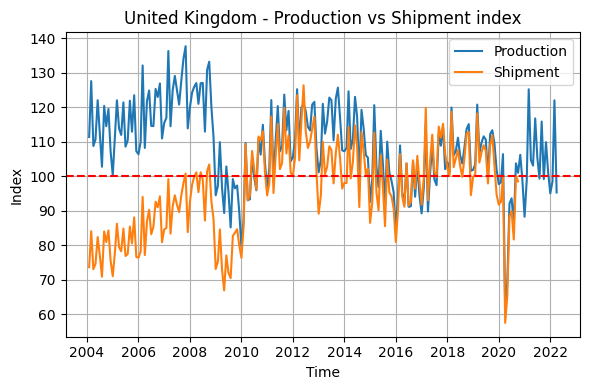

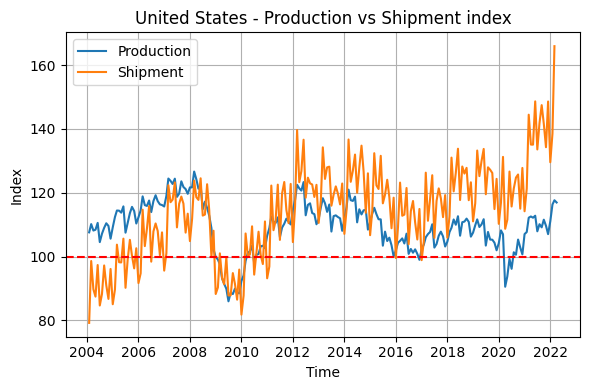

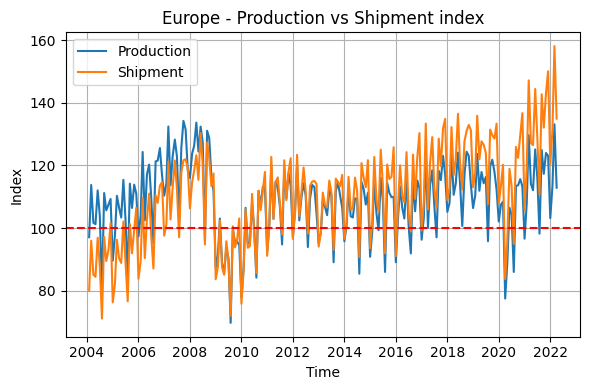

In [207]:
label_mapping = {
    'MAB_ELE_PRO156': 'China',
    'MAB_ELE_PRO250': 'France',
    'MAB_ELE_PRO276': 'Germany',
    'MAB_ELE_PRO380': 'Italy',
    'MAB_ELE_PRO392': 'Japan',
    'MAB_ELE_PRO756': 'Switzerland',
    'MAB_ELE_PRO826': 'United Kingdom',
    'MAB_ELE_PRO840': 'United States',
    'MAB_ELE_PRO1100': 'Europe'
}
column_pairs = [('MAB_ELE_PRO156', 'MAB_ELE_SHP156'),
                ('MAB_ELE_PRO250', 'MAB_ELE_SHP250'),
                ('MAB_ELE_PRO276', 'MAB_ELE_SHP276'),
                ('MAB_ELE_PRO380', 'MAB_ELE_SHP380'),
                ('MAB_ELE_PRO392', 'MAB_ELE_SHP392'),
                ('MAB_ELE_PRO756', 'MAB_ELE_SHP756'),
                ('MAB_ELE_PRO826', 'MAB_ELE_SHP826'),
                ('MAB_ELE_PRO840', 'MAB_ELE_SHP840'),
                ('MAB_ELE_PRO1100',	'MAB_ELE_SHP1100')]

# Plot each pair of columns in smaller figures
for i, pair in enumerate(column_pairs, start=1):
    plt.figure(figsize=(6, 4))  # Set smaller figure size
    plt.plot(df.index, df[pair[0]], label='Production')
    plt.plot(df.index, df[pair[1]], label='Shipment')
    plt.axhline(y=100, color='red', linestyle='--')  # Add dashed line at y=100
    plt.xlabel('Time')
    plt.ylabel('Index')
    plt.title(f'{label_mapping[pair[0]]} - Production vs Shipment index')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Raw Materials World Prices

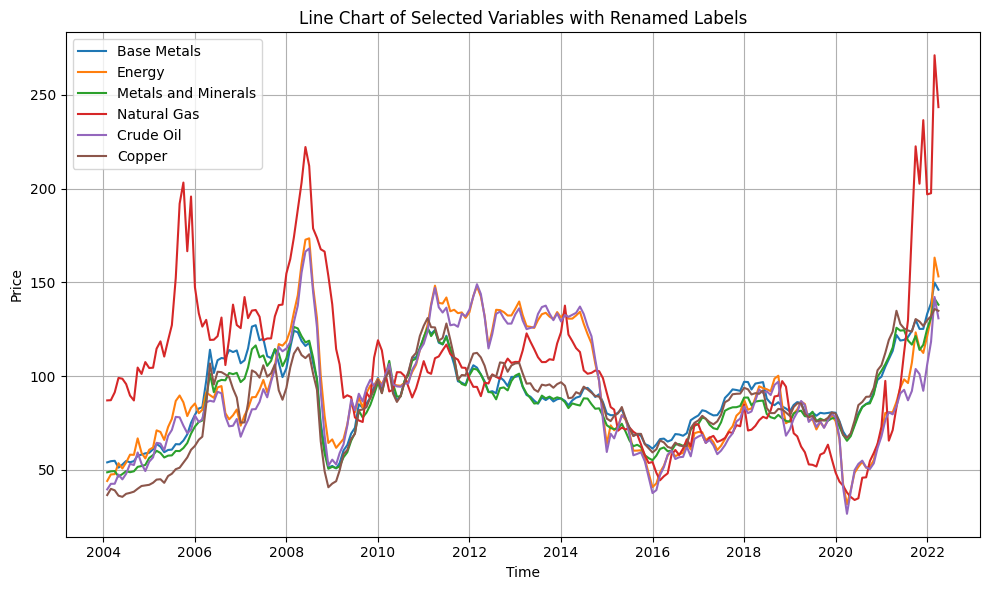

In [208]:
label_mapping = {
    'RohiBASEMET1000_org': 'Base Metals',
    'RohiENERGY1000_org': 'Energy',
    'RohiMETMIN1000_org': 'Metals and Minerals',
    'RohiNATGAS1000_org': 'Natural Gas',
    'RohCRUDE_PETRO1000_org': 'Crude Oil',
    'RohCOPPER1000_org': 'Copper'
}

# Plot the specified columns with renamed labels
plt.figure(figsize=(10, 6))
columns_to_plot = ['RohiBASEMET1000_org', 'RohiENERGY1000_org', 
                   'RohiMETMIN1000_org', 'RohiNATGAS1000_org', 
                   'RohCRUDE_PETRO1000_org', 'RohCOPPER1000_org']
for column in columns_to_plot:
    plt.plot(df.index, df[column], label=label_mapping[column])

plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Line Chart of Selected Variables with Renamed Labels')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Producer Prices

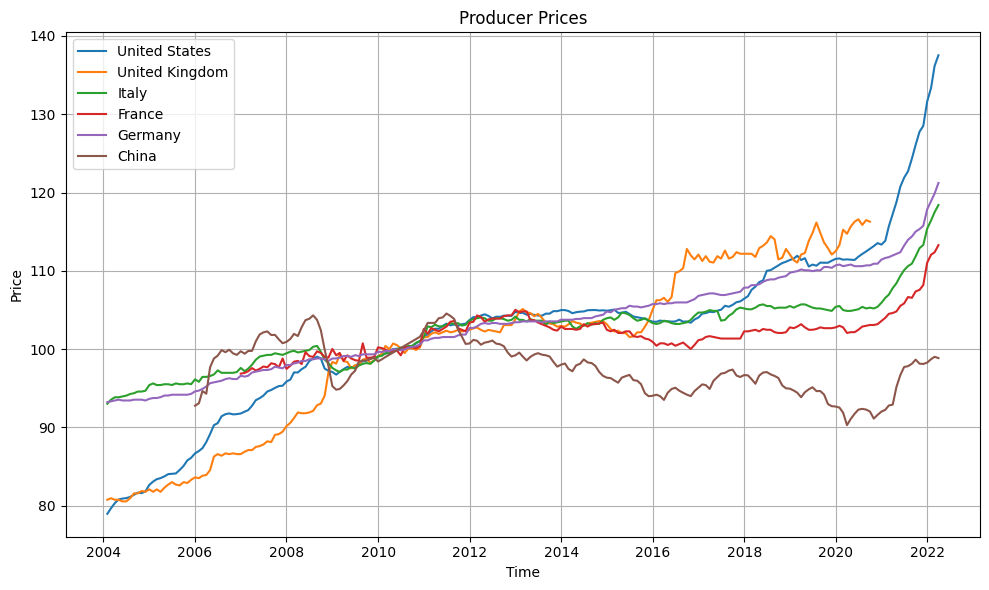

In [209]:
label_mapping = {
    'PRI27840_org': 'United States',
    'PRI27826_org': 'United Kingdom',	
    'PRI27380_org': 'Italy',	
    'PRI27250_org': 'France',	
    'PRI27276_org': 'Germany',	
    'PRI27156_org': 'China'
}

plt.figure(figsize=(10, 6))

columns_to_plot = ['PRI27840_org',	'PRI27826_org',	'PRI27380_org',	'PRI27250_org',	'PRI27276_org',	'PRI27156_org']

for column in columns_to_plot:
    plt.plot(df.index, df[column], label=label_mapping[column])

plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Producer Prices')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Production Index - Machinery and Equipment

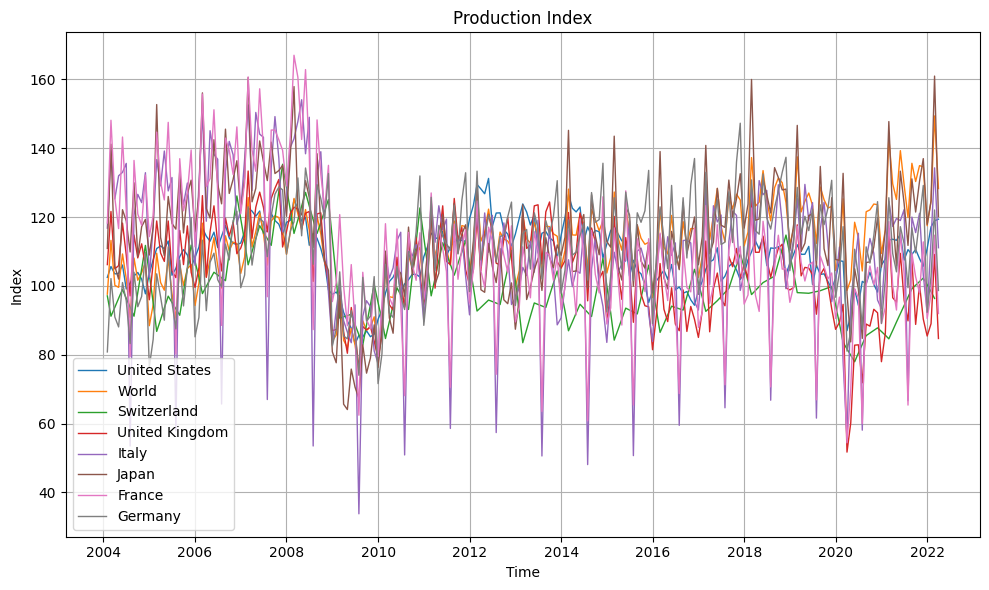

In [210]:
							

label_mapping = {
    'PRO28840_org': 'United States',
    'PRO281000_org': 'World',	
    'PRO28756_org': 'Switzerland',	
    'PRO28826_org': 'United Kingdom',	
    'PRO28380_org': 'Italy',	
    'PRO28392_org': 'Japan',
    'PRO28250_org': 'France',
    'PRO28276_org': 'Germany'
}

plt.figure(figsize=(10, 6))

columns_to_plot = ['PRO28840_org', 'PRO281000_org', 'PRO28756_org', 'PRO28826_org',	'PRO28380_org',	'PRO28392_org',	'PRO28250_org',	'PRO28276_org']

for column in columns_to_plot:
    plt.plot(df.index, df[column], label=label_mapping[column], linewidth=1)

plt.xlabel('Time')
plt.ylabel('Index')
plt.title('Production Index')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Production Index - Electrical Equipment

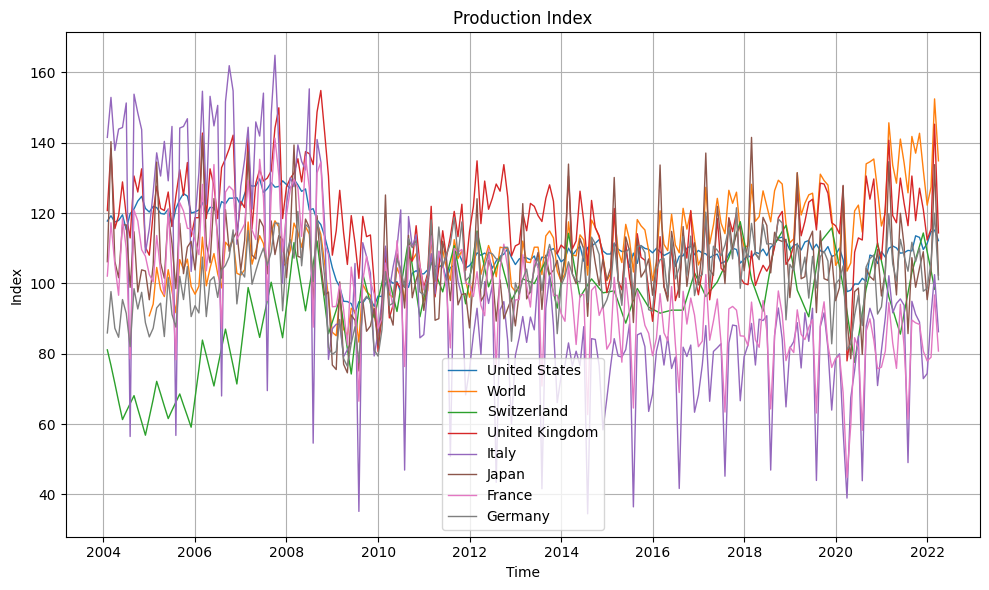

In [211]:
label_mapping = {
    'PRO27840_org': 'United States',
    'PRO271000_org': 'World',	
    'PRO27756_org': 'Switzerland',	
    'PRO27826_org': 'United Kingdom',	
    'PRO27380_org': 'Italy',	
    'PRO27392_org': 'Japan',
    'PRO27250_org': 'France',
    'PRO27276_org': 'Germany'
}
							

plt.figure(figsize=(10, 6))

columns_to_plot = ['PRO27840_org',	'PRO271000_org',	'PRO27756_org',	'PRO27826_org',	'PRO27380_org',	'PRO27392_org',	'PRO27250_org',	'PRO27276_org']

for column in columns_to_plot:
    plt.plot(df.index, df[column], label=label_mapping[column], linewidth=1)

plt.xlabel('Time')
plt.ylabel('Index')
plt.title('Production Index')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Missing values check

In [212]:
df_missing = df.copy()

In [213]:
df_missing.isna().sum()

MAB_ELE_PRO156             0
MAB_ELE_SHP156             0
MAB_ELE_PRO250             0
MAB_ELE_SHP250             0
MAB_ELE_PRO276             0
MAB_ELE_SHP276             0
MAB_ELE_PRO380             0
MAB_ELE_SHP380             0
MAB_ELE_PRO392             0
MAB_ELE_SHP392             0
MAB_ELE_PRO756             1
MAB_ELE_SHP756             1
MAB_ELE_PRO826             0
MAB_ELE_SHP826            18
MAB_ELE_PRO840             0
MAB_ELE_SHP840             1
MAB_ELE_PRO1100            0
MAB_ELE_SHP1100            0
RohiBASEMET1000_org        0
RohiENERGY1000_org         0
RohiMETMIN1000_org         0
RohiNATGAS1000_org         0
RohCRUDE_PETRO1000_org     0
RohCOPPER1000_org          0
WKLWEUR840_org             0
PRI27840_org               0
PRI27826_org              18
PRI27380_org               0
PRI27250_org              35
PRI27276_org               0
PRI27156_org              23
PRO28840_org               0
PRO281000_org              0
PRO28756_org               1
PRO28826_org  

In [214]:
df_missing.isnull().sum() / len(df_missing)* 100

MAB_ELE_PRO156             0.000000
MAB_ELE_SHP156             0.000000
MAB_ELE_PRO250             0.000000
MAB_ELE_SHP250             0.000000
MAB_ELE_PRO276             0.000000
MAB_ELE_SHP276             0.000000
MAB_ELE_PRO380             0.000000
MAB_ELE_SHP380             0.000000
MAB_ELE_PRO392             0.000000
MAB_ELE_SHP392             0.000000
MAB_ELE_PRO756             0.456621
MAB_ELE_SHP756             0.456621
MAB_ELE_PRO826             0.000000
MAB_ELE_SHP826             8.219178
MAB_ELE_PRO840             0.000000
MAB_ELE_SHP840             0.456621
MAB_ELE_PRO1100            0.000000
MAB_ELE_SHP1100            0.000000
RohiBASEMET1000_org        0.000000
RohiENERGY1000_org         0.000000
RohiMETMIN1000_org         0.000000
RohiNATGAS1000_org         0.000000
RohCRUDE_PETRO1000_org     0.000000
RohCOPPER1000_org          0.000000
WKLWEUR840_org             0.000000
PRI27840_org               0.000000
PRI27826_org               8.219178
PRI27380_org               0

In [215]:
# variables with missing values 
missing_values = df_missing.isna().sum()
missing_values = missing_values[missing_values > 0]
missing_values

MAB_ELE_PRO756     1
MAB_ELE_SHP756     1
MAB_ELE_SHP826    18
MAB_ELE_SHP840     1
PRI27826_org      18
PRI27250_org      35
PRI27156_org      23
PRO28756_org       1
PRO271000_org     11
PRO27756_org       1
dtype: int64

In [216]:
missing_dates_list = []

# Iterate over each column with missing values
for col in missing_values.index:
    # Find dates with missing values for the current column
    missing_dates = df_missing[df_missing[col].isnull()].index
    # Create a dictionary for each variable and its missing dates
    for date in missing_dates:
        missing_dates_list.append({'Variable': col, 'Date': date})

# Create a DataFrame from the list of dictionaries
missing_dates_df = pd.DataFrame(missing_dates_list)
missing_dates_df

,Variable,Date
0,MAB_ELE_PRO756,2022-04-01
1,MAB_ELE_SHP756,2022-04-01
2,MAB_ELE_SHP826,2020-11-01
3,MAB_ELE_SHP826,2020-12-01
4,MAB_ELE_SHP826,2021-01-01
...,...,...
105,PRO271000_org,2004-09-01
106,PRO271000_org,2004-10-01
107,PRO271000_org,2004-11-01
108,PRO271000_org,2004-12-01


### MAB_ELE_PRO756

In [217]:
missing_dates_df[missing_dates_df['Variable'] == 'MAB_ELE_PRO756']

,Variable,Date
0,MAB_ELE_PRO756,2022-04-01


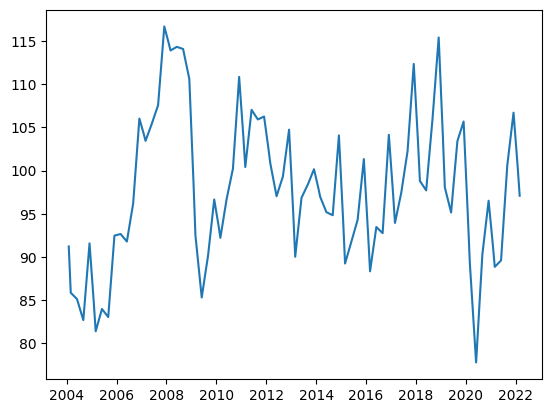

In [218]:
plt.plot(df_missing.index, df_missing['MAB_ELE_PRO756'])

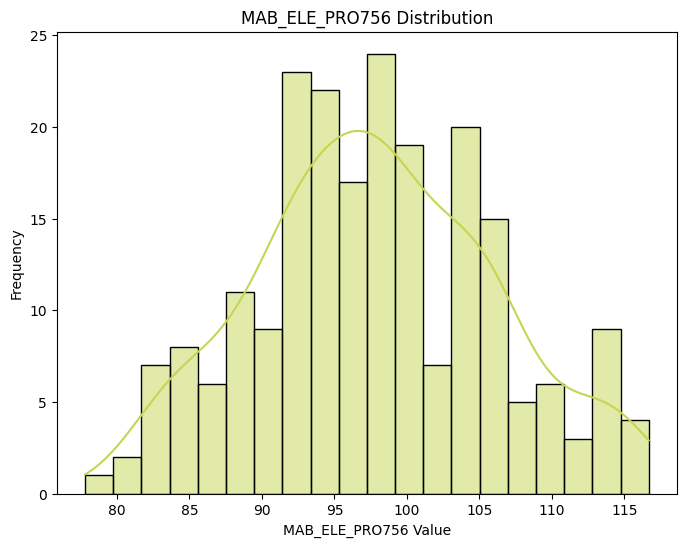

In [219]:
custom_color = "#C4D652"

# Create a new plot
plt.figure(figsize=(8, 6))

# Plot the histogram with customized color and KDE plot
sns.histplot(df_missing['MAB_ELE_PRO756'], bins=20, kde=True, color=custom_color, edgecolor='black', line_kws={'color': 'black'})

# Set the title of the plot
plt.title('MAB_ELE_PRO756 Distribution')

# Set labels for x-axis and y-axis
plt.xlabel('MAB_ELE_PRO756 Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [220]:
# check if this variable follows a normal distribution
values = df_missing['MAB_ELE_PRO756']

# Check for non-finite values and remove them
values = values[np.isfinite(values)]

# Fit the normal distribution to the finite values
mu, std = norm.fit(values)

# Perform the Kolmogorov-Smirnov test
kstest_result = kstest(values, 'norm', args=(mu, std))
print('Kolmogorov-Smirnov test result:', kstest_result)

Kolmogorov-Smirnov test result: KstestResult(statistic=0.03355294043326207, pvalue=0.9599066031404988, statistic_location=99.13383301065345, statistic_sign=1)


This variable follows a normal distribution, p-value > 0.05, so we will fill the missing values with a prediction based simple moving average.

In [221]:
window_size = 12
sma_value = df_missing['MAB_ELE_PRO756'].rolling(window=window_size, min_periods=1).mean()

specific_date = '2022-04-01'
df_missing.at[specific_date, 'MAB_ELE_PRO756'] = sma_value.loc[specific_date]

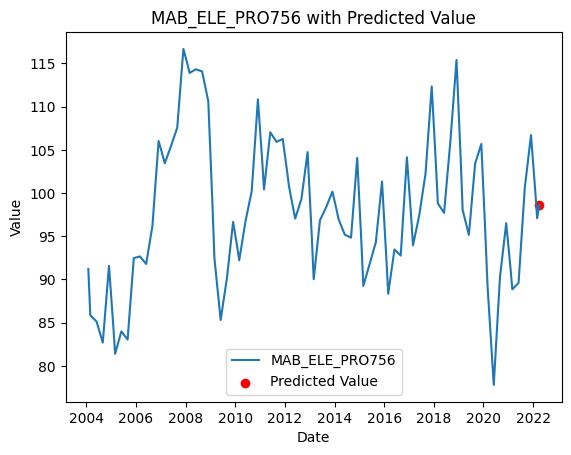

In [222]:
plt.plot(df_missing.index, df_missing['MAB_ELE_PRO756'], label='MAB_ELE_PRO756')

# Convert the predicted_date string to a datetime object
predicted_date = pd.to_datetime('2022-04-01')

# Plot a point (ball) at the predicted point
plt.scatter(predicted_date, df_missing.at[predicted_date, 'MAB_ELE_PRO756'], color='red', label='Predicted Value')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('MAB_ELE_PRO756 with Predicted Value')

# Add legend
plt.legend()

# Show plot
plt.show()


### MAB_ELE_SHP756

In [223]:
missing_dates_df[missing_dates_df['Variable'] == 'MAB_ELE_SHP756']

,Variable,Date
1,MAB_ELE_SHP756,2022-04-01


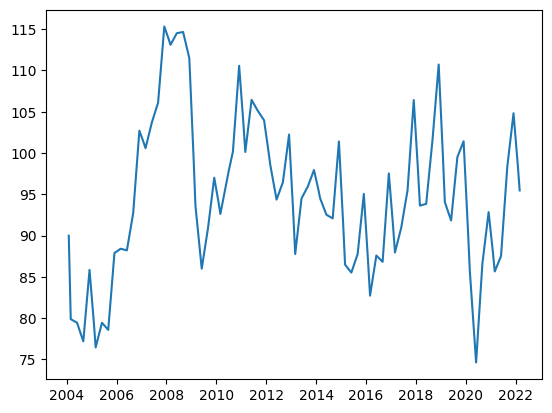

In [224]:
plt.plot(df_missing.index, df_missing['MAB_ELE_SHP756'])

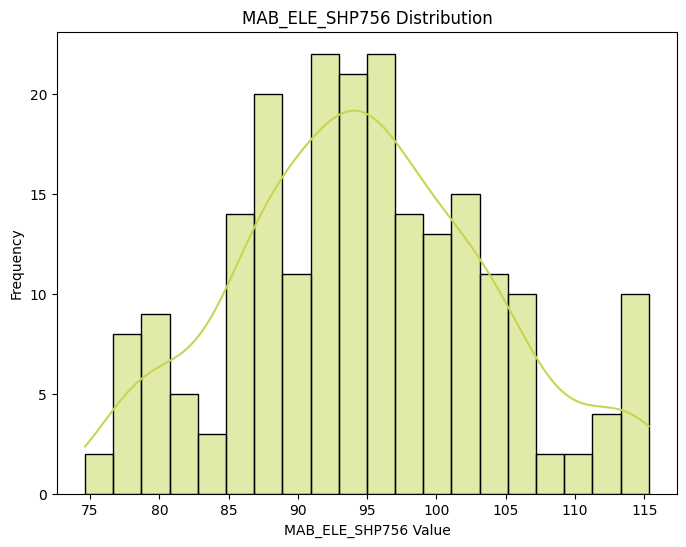

In [225]:
custom_color = "#C4D652"

# Create a new plot
plt.figure(figsize=(8, 6))

# Plot the histogram with customized color and KDE plot
sns.histplot(df_missing['MAB_ELE_SHP756'], bins=20, kde=True, color=custom_color, edgecolor='black', line_kws={'color': 'black'})

# Set the title of the plot
plt.title('MAB_ELE_SHP756 Distribution')

# Set labels for x-axis and y-axis
plt.xlabel('MAB_ELE_SHP756 Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [226]:
values = df_missing['MAB_ELE_SHP756']

# Check for non-finite values and remove them
values = values[np.isfinite(values)]

# Fit the normal distribution to the finite values
mu, std = norm.fit(values)

# Perform the Kolmogorov-Smirnov test
kstest_result = kstest(values, 'norm', args=(mu, std))
print('Kolmogorov-Smirnov test result:', kstest_result)

Kolmogorov-Smirnov test result: KstestResult(statistic=0.03556483427838519, pvalue=0.9363157564843992, statistic_location=95.75781617499096, statistic_sign=1)


This variable follows a normal distribution, p-value > 0.05, so we will fill the missing values with a prediction based simple moving average.

In [227]:
window_size = 12
sma_value = df_missing['MAB_ELE_SHP756'].rolling(window=window_size, min_periods=1).mean()

specific_date = '2022-04-01'
df_missing.at[specific_date, 'MAB_ELE_SHP756'] = sma_value.loc[specific_date]

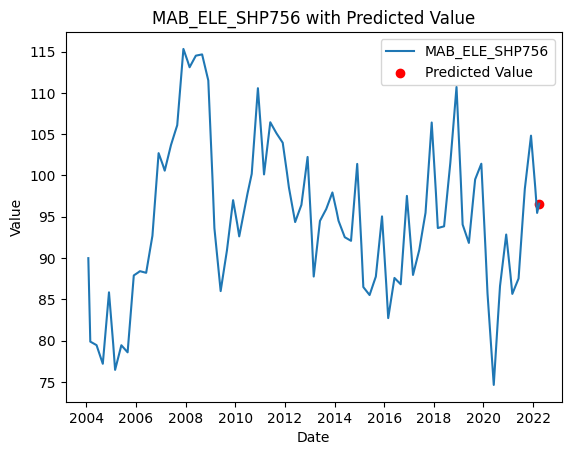

In [228]:
plt.plot(df_missing.index, df_missing['MAB_ELE_SHP756'], label='MAB_ELE_SHP756')

# Convert the predicted_date string to a datetime object
predicted_date = pd.to_datetime('2022-04-01')

# Plot a point (ball) at the predicted point
plt.scatter(predicted_date, df_missing.at[predicted_date, 'MAB_ELE_SHP756'], color='red', label='Predicted Value')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('MAB_ELE_SHP756 with Predicted Value')

# Add legend
plt.legend()

# Show plot
plt.show()


### MAB_ELE_SHP826

In [229]:
missing_dates_df[missing_dates_df['Variable'] == 'MAB_ELE_SHP826']

,Variable,Date
2,MAB_ELE_SHP826,2020-11-01
3,MAB_ELE_SHP826,2020-12-01
4,MAB_ELE_SHP826,2021-01-01
5,MAB_ELE_SHP826,2021-02-01
6,MAB_ELE_SHP826,2021-03-01
7,MAB_ELE_SHP826,2021-04-01
8,MAB_ELE_SHP826,2021-05-01
9,MAB_ELE_SHP826,2021-06-01
10,MAB_ELE_SHP826,2021-07-01
11,MAB_ELE_SHP826,2021-08-01


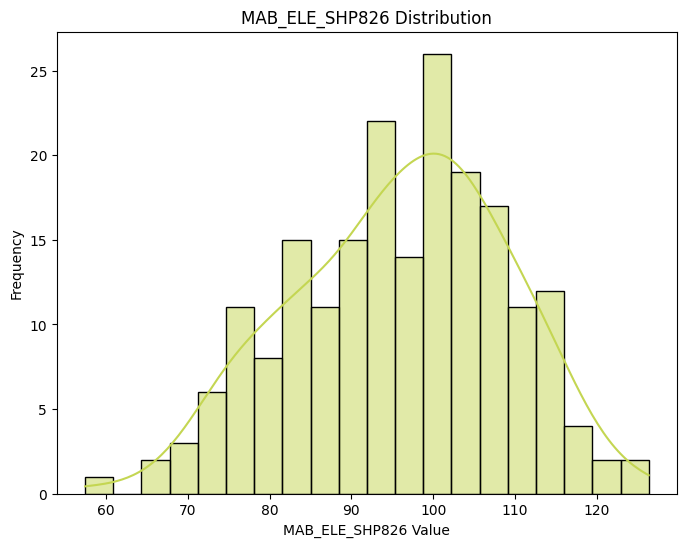

In [230]:
custom_color = "#C4D652"

# Create a new plot
plt.figure(figsize=(8, 6))

# Plot the histogram with customized color and KDE plot
sns.histplot(df_missing['MAB_ELE_SHP826'], bins=20, kde=True, color=custom_color, edgecolor='black', line_kws={'color': 'black'})

# Set the title of the plot
plt.title('MAB_ELE_SHP826 Distribution')

# Set labels for x-axis and y-axis
plt.xlabel('MAB_ELE_SHP826 Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [231]:
values = df_missing['MAB_ELE_SHP826']

# Check for non-finite values and remove them
values = values[np.isfinite(values)]

# Fit the normal distribution to the finite values
mu, std = norm.fit(values)

# Perform the Kolmogorov-Smirnov test
kstest_result = kstest(values, 'norm', args=(mu, std))
print('Kolmogorov-Smirnov test result:', kstest_result)

Kolmogorov-Smirnov test result: KstestResult(statistic=0.06133403153157474, pvalue=0.4193607503022948, statistic_location=97.8689175360359, statistic_sign=-1)


This variable follows a normal distribution, p-value > 0.05. As this one has a lot of missing data, we will fill the missing values with a prediction based on a normal distribution.

In [232]:
# Calculate mean and standard deviation of the column
mean_value = df_missing['MAB_ELE_SHP826'].mean()
std_value = df_missing['MAB_ELE_SHP826'].std()

# Get the number of missing values
num_missing = df_missing['MAB_ELE_SHP826'].isnull().sum()

# Generate a sequence of random values from a normal distribution
predictions = norm.rvs(loc=mean_value, scale=std_value, size=num_missing)

# Get the indices of the missing values
missing_indexes = df_missing[df_missing['MAB_ELE_SHP826'].isnull()].index

# Create a pd.Series with the predictions for the missing indexes
predictions_series = pd.Series(predictions, index=missing_indexes)

# Fill the missing values in the 'MAB_ELE_SHP826' column with the predictions
df_missing['MAB_ELE_SHP826'].fillna(predictions_series, inplace=True)

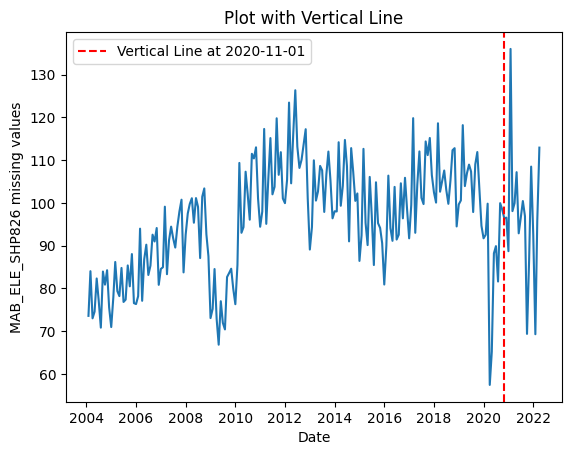

In [233]:
# Convert date string to datetime object
vertical_line_date = pd.to_datetime('2020-11-01')

# Plot the data
plt.plot(df_missing.index, df_missing['MAB_ELE_SHP826'])

# Add a vertical line at the specified date
plt.axvline(vertical_line_date, color='red', linestyle='--', label='Vertical Line at 2020-11-01')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('MAB_ELE_SHP826 missing values')
plt.title('Plot with Vertical Line')
plt.legend()

# Show the plot
plt.show()


### MAB_ELE_SHP840

In [234]:
missing_dates_df[missing_dates_df['Variable'] == 'MAB_ELE_SHP840']

,Variable,Date
20,MAB_ELE_SHP840,2022-04-01


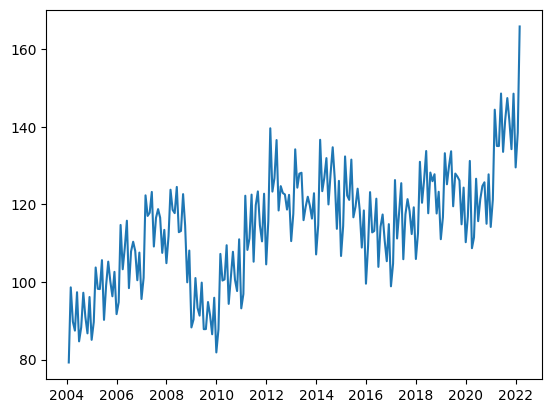

In [235]:
plt.plot(df_missing.index, df_missing['MAB_ELE_SHP840'])

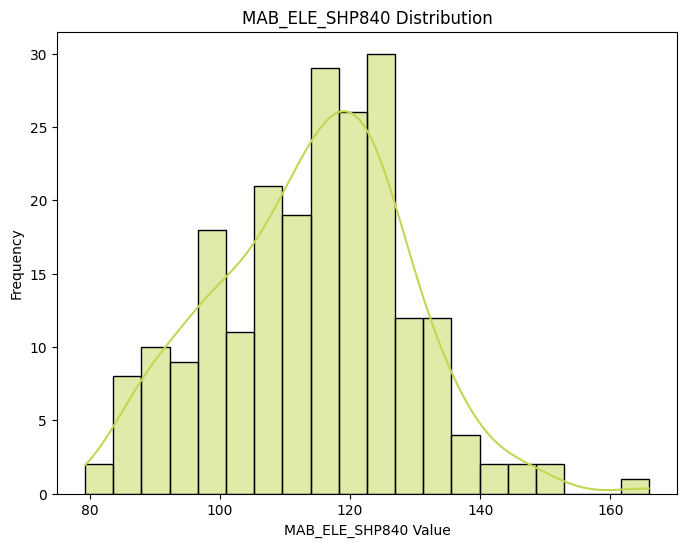

In [236]:
custom_color = "#C4D652"

# Create a new plot
plt.figure(figsize=(8, 6))

# Plot the histogram with customized color and KDE plot
sns.histplot(df_missing['MAB_ELE_SHP840'], bins=20, kde=True, color=custom_color, edgecolor='black', line_kws={'color': 'black'})

# Set the title of the plot
plt.title('MAB_ELE_SHP840 Distribution')

# Set labels for x-axis and y-axis
plt.xlabel('MAB_ELE_SHP840 Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [237]:
values = df_missing['MAB_ELE_SHP840']

# Check for non-finite values and remove them
values = values[np.isfinite(values)]

# Fit the normal distribution to the finite values
mu, std = norm.fit(values)

# Perform the Kolmogorov-Smirnov test
kstest_result = kstest(values, 'norm', args=(mu, std))
print('Kolmogorov-Smirnov test result:', kstest_result)

Kolmogorov-Smirnov test result: KstestResult(statistic=0.051721592396788474, pvalue=0.58589942947542, statistic_location=114.20624470734083, statistic_sign=-1)


This variable follows a normal distribution, p-value > 0.05, so we will fill the missing values with a prediction based simple moving average.

In [238]:
window_size = 12
sma_value = df_missing['MAB_ELE_SHP840'].rolling(window=window_size, min_periods=1).mean()

specific_date = '2022-04-01'
df_missing.at[specific_date, 'MAB_ELE_SHP840'] = sma_value.loc[specific_date]

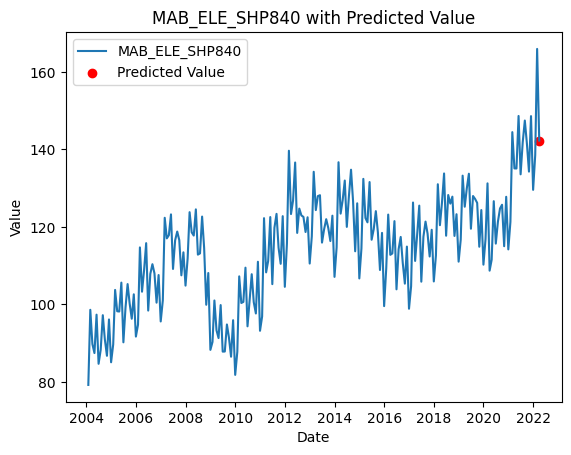

In [239]:

plt.plot(df_missing.index, df_missing['MAB_ELE_SHP840'], label='MAB_ELE_SHP840')

# Convert the predicted_date string to a datetime object
predicted_date = pd.to_datetime('2022-04-01')

# Plot a point (ball) at the predicted point
plt.scatter(predicted_date, df_missing.at[predicted_date, 'MAB_ELE_SHP840'], color='red', label='Predicted Value')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('MAB_ELE_SHP840 with Predicted Value')

# Add legend
plt.legend()

# Show plot
plt.show()


## PRI27826_org      18

In [240]:
missing_dates_df[missing_dates_df['Variable'] == 'PRI27826_org']

,Variable,Date
21,PRI27826_org,2020-11-01
22,PRI27826_org,2020-12-01
23,PRI27826_org,2021-01-01
24,PRI27826_org,2021-02-01
25,PRI27826_org,2021-03-01
26,PRI27826_org,2021-04-01
27,PRI27826_org,2021-05-01
28,PRI27826_org,2021-06-01
29,PRI27826_org,2021-07-01
30,PRI27826_org,2021-08-01


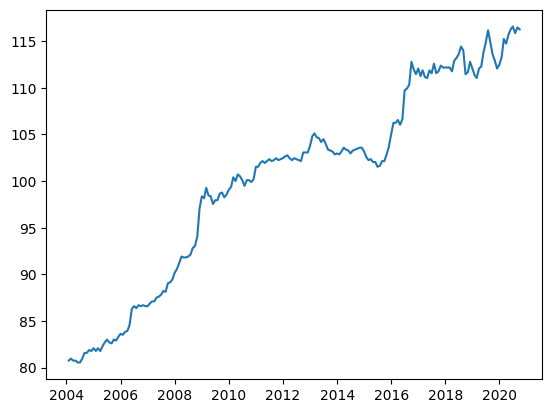

In [241]:
plt.plot(df_missing.index, df_missing['PRI27826_org'])

In [242]:
values = df_missing['PRI27826_org']

# Check for non-finite values and remove them
values = values[np.isfinite(values)]

# Fit the normal distribution to the finite values
mu, std = norm.fit(values)

# Perform the Kolmogorov-Smirnov test
kstest_result = kstest(values, 'norm', args=(mu, std))
print('Kolmogorov-Smirnov test result:', kstest_result)

Kolmogorov-Smirnov test result: KstestResult(statistic=0.13938535383754924, pvalue=0.0007203282840176474, statistic_location=101.5353164672852, statistic_sign=-1)


`PRI27826_org` does not follow a normal distribution because p-value < 0.05, so we will take another approach

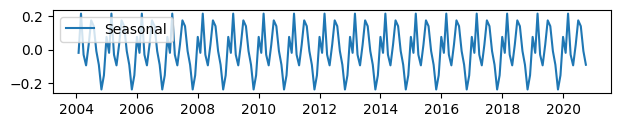

In [243]:
# Convert index to datetime if it's not already in datetime format
df_season = df_missing[df_missing['PRI27826_org'].notna()]
df_season.index = pd.to_datetime(df_season.index)

# Perform seasonal decomposition
decomposition = seasonal_decompose(df_season['PRI27826_org'], model='additive', period=12)  # Assuming monthly data with yearly seasonality


# Plot the seasonal component
plt.subplot(413)
plt.plot(df_season.index, decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.tight_layout()

# Show plot
plt.show()

In [244]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Extract the series
series = df_missing['PRI27826_org'].dropna()

# Fit the exponential smoothing model
model = ExponentialSmoothing(series, seasonal='multiplicative', trend = 'multiplicative')
fitted_model = model.fit()

# Forecast future values
n_periods = 18
forecast = fitted_model.forecast(steps=n_periods)

# Replace NaN values in the original dataframe with the forecasted values
nan_indices = df_missing.index[df_missing['PRI27826_org'].isna()]
df_missing.loc[nan_indices, 'PRI27826_org'] = forecast

# Update df_missing with the filled NaN values
# df_missing.update(nan_rows) # No need for this with the direct assignment above

# Now df_missing contains the filled NaN values using exponential smoothing

c:\Users\User\anaconda3\envs\DM2324\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


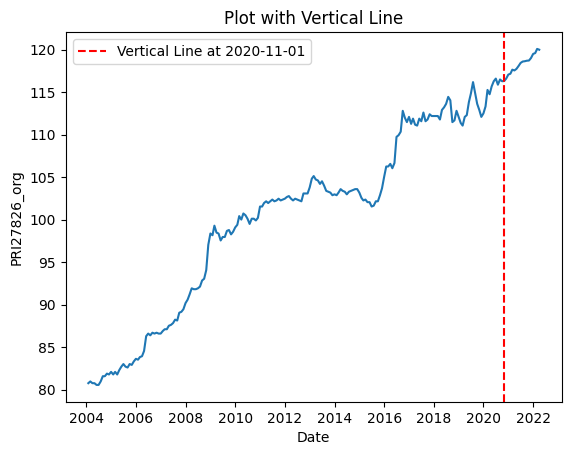

In [245]:
# Convert date string to datetime object
vertical_line_date = pd.to_datetime('2020-11-01')

# Plot the data
plt.plot(df_missing.index, df_missing['PRI27826_org'])

# Add a vertical line at the specified date
plt.axvline(vertical_line_date, color='red', linestyle='--', label='Vertical Line at 2020-11-01')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('PRI27826_org')
plt.title('Plot with Vertical Line')
plt.legend()

# Show the plot
plt.show()


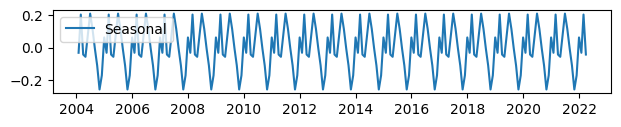

In [246]:
# Convert index to datetime if it's not already in datetime format
df_season = df_missing[df_missing['PRI27826_org'].notna()]
df_season.index = pd.to_datetime(df_season.index)

# Perform seasonal decomposition
decomposition = seasonal_decompose(df_season['PRI27826_org'], model='additive', period=12)  # Assuming monthly data with yearly seasonality


# Plot the seasonal component
plt.subplot(413)
plt.plot(df_season.index, decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.tight_layout()

# Show plot
plt.show()

## PRI27250_org


In [247]:
missing_dates_df[missing_dates_df['Variable'] == 'PRI27250_org']

,Variable,Date
39,PRI27250_org,2004-02-01
40,PRI27250_org,2004-03-01
41,PRI27250_org,2004-04-01
42,PRI27250_org,2004-05-01
43,PRI27250_org,2004-06-01
44,PRI27250_org,2004-07-01
45,PRI27250_org,2004-08-01
46,PRI27250_org,2004-09-01
47,PRI27250_org,2004-10-01
48,PRI27250_org,2004-11-01


As the missing values are from 2004 until 2016, and the predictions we are going to do start in 2018, we will don´t deal with them

## PRI27156_org

In [248]:
missing_dates_df[missing_dates_df['Variable'] == 'PRI27156_org']

,Variable,Date
74,PRI27156_org,2004-02-01
75,PRI27156_org,2004-03-01
76,PRI27156_org,2004-04-01
77,PRI27156_org,2004-05-01
78,PRI27156_org,2004-06-01
79,PRI27156_org,2004-07-01
80,PRI27156_org,2004-08-01
81,PRI27156_org,2004-09-01
82,PRI27156_org,2004-10-01
83,PRI27156_org,2004-11-01


As the missing values are from 2004 until 2005, and the predictions we are going to do start in 2018, we will don´t deal with them

### PRO28756_org

In [249]:
missing_dates_df[missing_dates_df['Variable'] == 'PRO28756_org']

,Variable,Date
97,PRO28756_org,2022-04-01


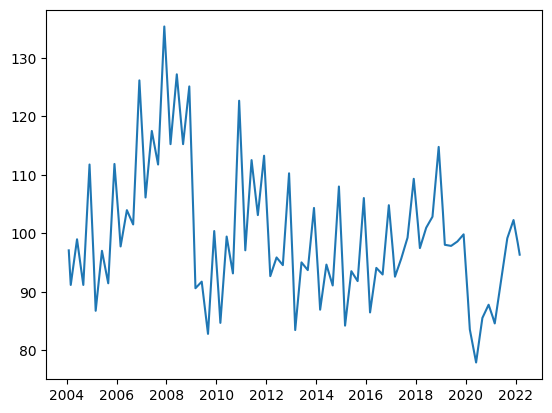

In [250]:
plt.plot(df_missing.index, df_missing['PRO28756_org'])

In [251]:
values = df_missing['PRO28756_org']

# Check for non-finite values and remove them
values = values[np.isfinite(values)]

# Fit the normal distribution to the finite values
mu, std = norm.fit(values)

# Perform the Kolmogorov-Smirnov test
kstest_result = kstest(values, 'norm', args=(mu, std))
print('Kolmogorov-Smirnov test result:', kstest_result)

Kolmogorov-Smirnov test result: KstestResult(statistic=0.09346776565773329, pvalue=0.041509762014879326, statistic_location=102.46536745714955, statistic_sign=1)


`PRO28756_org` does not follow a normal distribution because p-value < 0.05, so we will take another approach

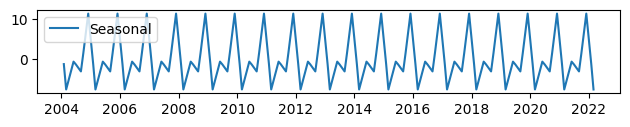

In [252]:
## Checking seasonality

from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming df_season contains your time series data with the 'PRO28756_org' column
# Convert index to datetime if it's not already in datetime format
df_season = df_missing[df_missing['PRO28756_org'].notna()]
df_season.index = pd.to_datetime(df_season.index)

# Perform seasonal decomposition
decomposition = seasonal_decompose(df_season['PRO28756_org'], model='additive', period=12)  # Assuming monthly data with yearly seasonality

# # Plot the original time series
# plt.figure(figsize=(10, 6))
# plt.subplot(411)
# plt.plot(df_season.index, df_season['PRO28756_org'].values, label='Original')
# plt.legend(loc='upper left')

# # Plot the trend component
# plt.subplot(412)
# plt.plot(df_season.index, decomposition.trend, label='Trend')
# plt.legend(loc='upper left')

# Plot the seasonal component
plt.subplot(413)
plt.plot(df_season.index, decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

# # Plot the residual component
# plt.subplot(414)
# plt.plot(df_season.index, decomposition.resid, label='Residual')
# plt.legend(loc='upper left')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [253]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Extract the series
series = df_missing['PRO28756_org'].dropna()

# Fit the exponential smoothing model
model = ExponentialSmoothing(series, seasonal='multiplicative', trend = 'multiplicative')
fitted_model = model.fit()

# Forecast future values
n_periods = 18
forecast = fitted_model.forecast(steps=n_periods)

# Replace NaN values in the original dataframe with the forecasted values
nan_indices = df_missing.index[df_missing['PRO28756_org'].isna()]
df_missing.loc[nan_indices, 'PRO28756_org'] = forecast

# Update df_missing with the filled NaN values
# df_missing.update(nan_rows) # No need for this with the direct assignment above

# Now df_missing contains the filled NaN values using exponential smoothing

c:\Users\User\anaconda3\envs\DM2324\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


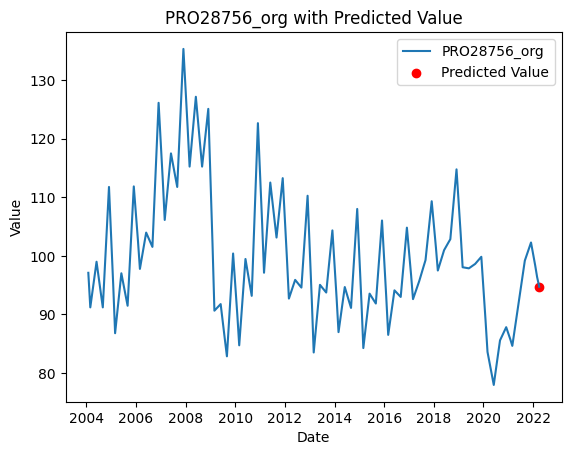

In [256]:

plt.plot(df_missing.index, df_missing['PRO28756_org'], label='PRO28756_org')

# Convert the predicted_date string to a datetime object
predicted_date = pd.to_datetime('2022-04-01')

# Plot a point (ball) at the predicted point
plt.scatter(predicted_date, df_missing.at[predicted_date, 'PRO28756_org'], color='red', label='Predicted Value')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('PRO28756_org with Predicted Value')

# Add legend
plt.legend()

# Show plot
plt.show()


### PRO271000_org

In [257]:
missing_dates_df[missing_dates_df['Variable'] == 'PRO271000_org']

,Variable,Date
98,PRO271000_org,2004-02-01
99,PRO271000_org,2004-03-01
100,PRO271000_org,2004-04-01
101,PRO271000_org,2004-05-01
102,PRO271000_org,2004-06-01
103,PRO271000_org,2004-07-01
104,PRO271000_org,2004-08-01
105,PRO271000_org,2004-09-01
106,PRO271000_org,2004-10-01
107,PRO271000_org,2004-11-01


As the missing values are from 2004 and the predictions we are going to do start in 2018, we will don´t deal with them

### PRO27756_org

In [258]:
missing_dates_df[missing_dates_df['Variable'] == 'PRO27756_org']

,Variable,Date
109,PRO27756_org,2022-04-01


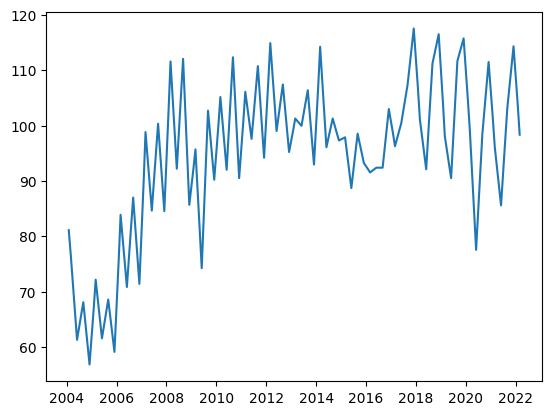

In [259]:
plt.plot(df_missing.index, df_missing['PRO27756_org'])

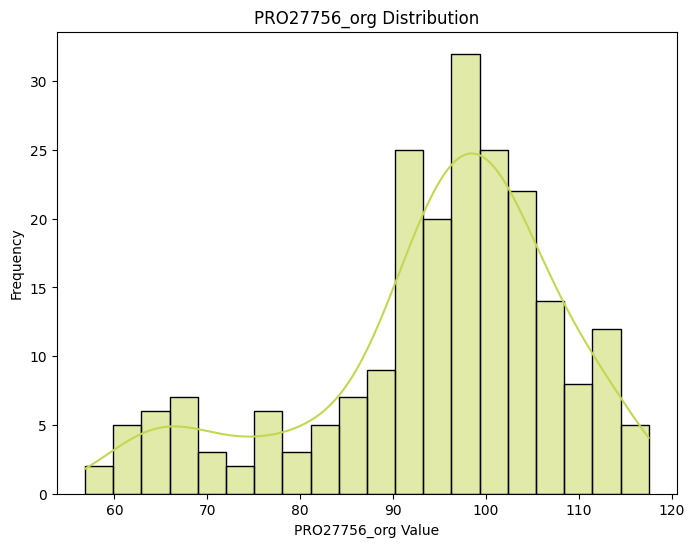

In [260]:
custom_color = "#C4D652"

# Create a new plot
plt.figure(figsize=(8, 6))

# Plot the histogram with customized color and KDE plot
sns.histplot(df_missing['PRO27756_org'], bins=20, kde=True, color=custom_color, edgecolor='black', line_kws={'color': 'black'})

# Set the title of the plot
plt.title('PRO27756_org Distribution')

# Set labels for x-axis and y-axis
plt.xlabel('PRO27756_org Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [261]:
# check if this variable follows a normal distribution
values = df_missing['PRO27756_org']

# Check for non-finite values and remove them
values = values[np.isfinite(values)]

# Fit the normal distribution to the finite values
mu, std = norm.fit(values)

# Perform the Kolmogorov-Smirnov test
kstest_result = kstest(values, 'norm', args=(mu, std))
print('Kolmogorov-Smirnov test result:', kstest_result)

Kolmogorov-Smirnov test result: KstestResult(statistic=0.14581694856098681, pvalue=0.00016494580739535706, statistic_location=91.44208037825058, statistic_sign=-1)


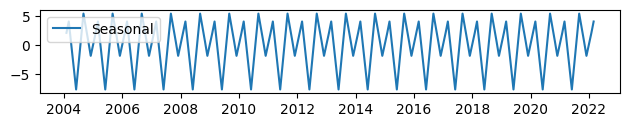

In [262]:
## Checking seasonality

from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming df_season contains your time series data with the 'PRO28756_org' column
# Convert index to datetime if it's not already in datetime format
df_season = df_missing[df_missing['PRO27756_org'].notna()]
df_season.index = pd.to_datetime(df_season.index)

# Perform seasonal decomposition
decomposition = seasonal_decompose(df_season['PRO27756_org'], model='additive', period=12)  # Assuming monthly data with yearly seasonality

# # Plot the original time series
# plt.figure(figsize=(10, 6))
# plt.subplot(411)
# plt.plot(df_season.index, df_season['PRO28756_org'].values, label='Original')
# plt.legend(loc='upper left')

# # Plot the trend component
# plt.subplot(412)
# plt.plot(df_season.index, decomposition.trend, label='Trend')
# plt.legend(loc='upper left')

# Plot the seasonal component
plt.subplot(413)
plt.plot(df_season.index, decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

# # Plot the residual component
# plt.subplot(414)
# plt.plot(df_season.index, decomposition.resid, label='Residual')
# plt.legend(loc='upper left')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [263]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Extract the series
series = df_missing['PRO27756_org'].dropna()

# Fit the exponential smoothing model
model = ExponentialSmoothing(series, seasonal='multiplicative', trend = 'multiplicative')
fitted_model = model.fit()

# Forecast future values
n_periods = 18
forecast = fitted_model.forecast(steps=n_periods)

# Replace NaN values in the original dataframe with the forecasted values
nan_indices = df_missing.index[df_missing['PRO27756_org'].isna()]
df_missing.loc[nan_indices, 'PRO27756_org'] = forecast

# Update df_missing with the filled NaN values
# df_missing.update(nan_rows) # No need for this with the direct assignment above

# Now df_missing contains the filled NaN values using exponential smoothing

c:\Users\User\anaconda3\envs\DM2324\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\User\anaconda3\envs\DM2324\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


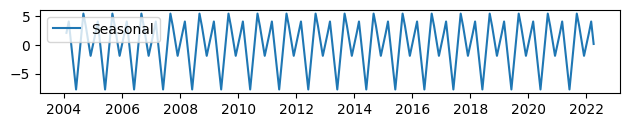

In [264]:
## Checking seasonality

from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming df_season contains your time series data with the 'PRO28756_org' column
# Convert index to datetime if it's not already in datetime format
df_season = df_missing[df_missing['PRO27756_org'].notna()]
df_season.index = pd.to_datetime(df_season.index)

# Perform seasonal decomposition
decomposition = seasonal_decompose(df_season['PRO27756_org'], model='additive', period=12)  # Assuming monthly data with yearly seasonality

# # Plot the original time series
# plt.figure(figsize=(10, 6))
# plt.subplot(411)
# plt.plot(df_season.index, df_season['PRO28756_org'].values, label='Original')
# plt.legend(loc='upper left')

# # Plot the trend component
# plt.subplot(412)
# plt.plot(df_season.index, decomposition.trend, label='Trend')
# plt.legend(loc='upper left')

# Plot the seasonal component
plt.subplot(413)
plt.plot(df_season.index, decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

# # Plot the residual component
# plt.subplot(414)
# plt.plot(df_season.index, decomposition.resid, label='Residual')
# plt.legend(loc='upper left')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Export df

In [80]:
df_missing.to_excel('market_updated.xlsx', index=True)